In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 12]

In [25]:
data_path = "data/covidtesting.csv"
with open(data_path, "r") as f:
     tests = pd.read_csv(f)

In [170]:
def clean_test_data(df):
    df = df.set_index("Reported Date")
    df = df.fillna(0)
    df = df.astype(int)
    df.index = pd.to_datetime(df.index)
    return df

In [29]:
tests = clean_test_data(tests)

In [30]:
tests.head()

,Confirmed Negative,Presumptive Negative,Under Investigation,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total patients approved for testing as of Reporting Date,Total Cases,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19
Reported Date,,,,,,,,,,,,
2020-01-26,0,0,9,1,0,0,0,0,0,0,0,0
2020-01-27,0,0,19,2,0,0,0,0,0,0,0,0
2020-01-28,0,0,11,1,1,0,0,0,1,0,0,0
2020-01-30,0,0,27,0,2,0,0,0,2,0,0,0
2020-01-31,0,0,17,0,2,0,0,0,2,0,0,0


In [16]:
tests.columns

Index(['Confirmed Negative', 'Presumptive Negative', 'Under Investigation',
       'Presumptive Positive', 'Confirmed Positive', 'Resolved', 'Deaths',
       'Total patients approved for testing as of Reporting Date',
       'Total Cases', 'Number of patients hospitalized with COVID-19',
       'Number of patients in ICU with COVID-19',
       'Number of patients in ICU on a ventilator with COVID-19'],
      dtype='object')

In [19]:
metrics = pd.DataFrame()

In [21]:
metrics["active"] = tests["Confirmed Positive"] - tests["Deaths"] - tests["Resolved"]

In [37]:
metrics["d_active"] = metrics["active"]/metrics["active"].shift(1)

In [231]:
government_interventions = [
    {
        "date": "2020-03-17", 
        "action": "State of emergency"
    }, 
    #    {
    #    "date": "2020-03-20", 
    #    "action": "US border closed"
    #}, 
        {
        "date": "2020-03-24", 
        "action": "Non-essential\nbusinesses closed"
    }, 
            {
        "date": "2020-04-03", 
        "action": "Non-essential\nbusiness list\nbroadened"
    }, 
]

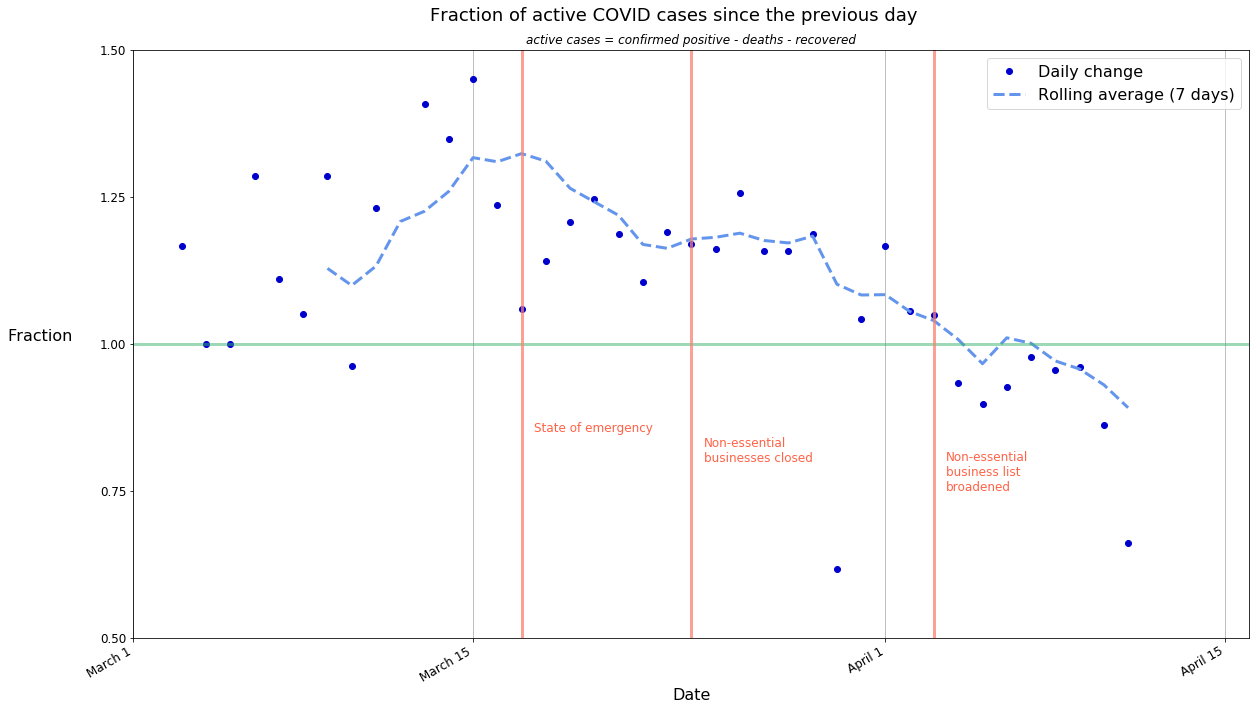

In [241]:
df = metrics
x = pd.to_datetime(df.index)
y = df["d_active"]
y_avg = y.rolling(7).mean()

fig, ax = plt.subplots()

ax.plot(x, y, "o",
        color="mediumblue",
        label="Daily change")
ax.plot(x, y_avg, "--", 
        color="cornflowerblue",
        linewidth=3,
        label="Rolling average (7 days)")
ax.axhline(1, 
           color="mediumseagreen",
           alpha=0.5,
          linewidth=3)


ax.set_ylim(0.5, 1.5)
ax.set_xlim(pd.to_datetime(["2020-03-01", "2020-04-16"]))

# Plot government interventions
trans = ax.get_xaxis_transform()
y_pos_initial = 0.35
y_pos_diff = 0.05
x_pos_pad = pd.Timedelta(days=0.5)
for n, intervention in enumerate(government_interventions):
    x_pos = pd.to_datetime(intervention["date"])
    y_pos = y_pos_initial - n * y_pos_diff
    ax.axvline(x_pos, color="salmon", linewidth=3, alpha=0.75)
    plt.text(
        x_pos + x_pos_pad, 
        y_pos, 
        intervention["action"], 
        fontsize=small_font,
        color="tomato",
        transform=trans
    )

small_font = 12
medium_font = 16
large_font = 18

fig.suptitle("Fraction of active COVID cases since the previous day", fontsize=large_font, y=0.93)
ax.set_title("active cases = confirmed positive - deaths - recovered", fontsize=small_font, style="italic")
ax.set_ylabel("Fraction", rotation=0, labelpad=60, fontsize=medium_font)
ax.set_xlabel("Date", fontsize=medium_font)
ax.tick_params(labelsize=small_font)
ax.legend(fontsize=medium_font, fancybox=True)

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.25))

ax.xaxis.set_major_formatter(mdates.DateFormatter("%B %-d"))
ax.xaxis.set_major_locator(mdates.DayLocator([1,15]))
ax.xaxis.grid(True, which="major")

fig.autofmt_xdate()
plt.show()

In [174]:
for col in morbid_cols:
    morbid_metrics[f"d_{col}"] = morbid_metrics[col] - morbid_metrics[col.shift(1)

In [175]:
morbid_metrics.tail(20)

,deaths,hospital,icu,ventilator,d_deaths,d_hospital,d_icu,d_ventilator
Reported Date,,,,,,,,
2020-03-23,6,0,0,0,1.0,0.0,0.0,0.0
2020-03-24,8,0,0,0,2.0,0.0,0.0,0.0
2020-03-25,13,0,0,0,5.0,0.0,0.0,0.0
2020-03-26,15,0,0,0,2.0,0.0,0.0,0.0
2020-03-27,18,0,0,0,3.0,0.0,0.0,0.0
2020-03-28,19,0,0,0,1.0,0.0,0.0,0.0
2020-03-29,23,0,0,0,4.0,0.0,0.0,0.0
2020-03-30,23,0,0,0,0.0,0.0,0.0,0.0
2020-03-31,33,0,0,0,10.0,0.0,0.0,0.0


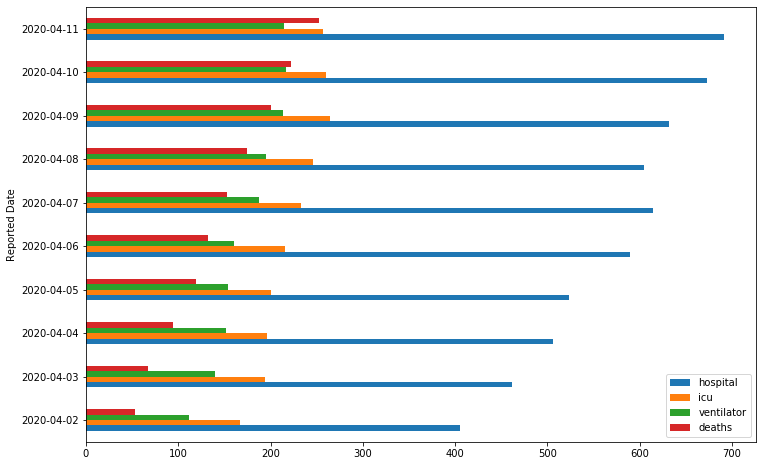

In [188]:
df = morbid_metrics[morbid_cols]
df[pd.to_datetime(df.index) > pd.to_datetime("2020-04-01")].plot.barh()
plt.show()